### Context

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

#### Anomaly Detection

You have also been requested to check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

In [1]:
data <- read.csv("Supermarket_Sales_Forecasting.csv")
head(data)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [2]:
dim(data)

[1] 1000    2

The dataset has 1000 rows and 2 columns

In [3]:
# Checking data structure
str(data)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


- Dataset is a dataframe
- Date should have datetime datatype
- Sales column has the correct datatype

In [4]:
# Converting sales from a factor to date type
data$Date <- as.Date(data$Date, "%m/%d/%Y")

In [6]:
# Checking new data structure.
str(data)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Date, format: "2019-01-05" "2019-03-08" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


Nice

#### Visualizing our dataset

In [10]:
install.packages("ggplot2")

Installing package into 'C:/Users/lggat/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lggat\AppData\Local\Temp\RtmpGqxMrM\downloaded_packages


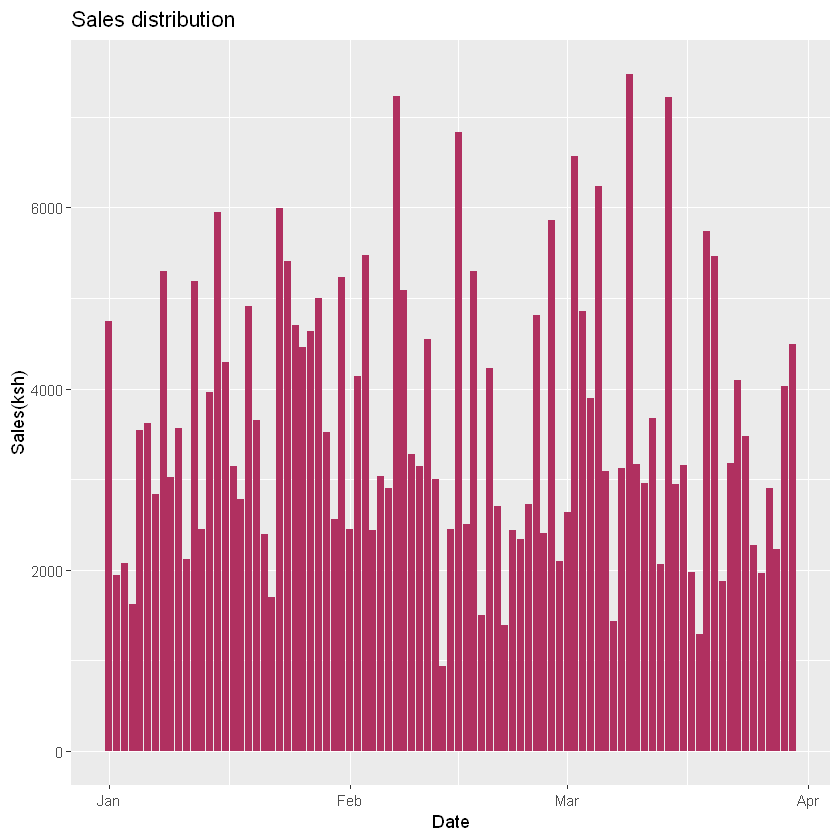

In [13]:
# Sales distribution over time
library(ggplot2)
ggplot(data = data, aes(x = Date, y = Sales)) +
      geom_bar(stat = "identity", fill = "maroon") +
      labs(title = "Sales distribution",
           x = "Date", y = "Sales(ksh)")

We observe a fluctuation in sales over the months, the highest being in March and lowest in February

In [14]:
# Load libraries
library(tidyverse)
library(anomalize)
library(tibbletime)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.3     
Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()
Warning message:
"package 'anomalize' was built under R version 3.6.3"== Use anomalize to improve your Forecasts by 50%! =============================
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>
Warning message:
"package 'tibbletime' was built under R version 3.6.3"
Attaching package: 'tibbletime'

The following object is masked from 'package:stats':

    filter



In [15]:
#Ordering the data by Date
data = data %>% arrange(Date)
head(data)

,Date,Sales
,<date>,<dbl>
1,2019-01-01,457.443
2,2019-01-01,399.756
3,2019-01-01,470.673
4,2019-01-01,388.290
5,2019-01-01,132.762
6,2019-01-01,132.027


In [16]:
# Since our data has many records per day, 
# We get the average per day, so that the data
data = aggregate(Sales ~ Date, data, mean)
head(data)

,Date,Sales
,<date>,<dbl>
1,2019-01-01,395.4318
2,2019-01-02,243.1879
3,2019-01-03,259.7661
4,2019-01-04,270.6148
5,2019-01-05,294.7236
6,2019-01-06,401.5783


In [17]:
# Converting data frame to a tibble time (tbl_time)
# tbl_time have a time index that contains information about which column 
# should be used for time-based subsetting and other time-based manipulation,

data = tbl_time(data, Date)
class(data)

[1] "tbl_time"   "tbl_df"     "tbl"        "data.frame"

In [18]:
# Checking the dimensions of the reduced data set
dim(data)

[1] 89  2

Our data has reduced to 89 rows

#### Detecting our anomalies
We now use the following functions to detect and visualize anomalies; We decomposed the “count” column into “observed”, “season”, “trend”, and “remainder” columns. The default values for time series decompose are method = "stl", which is just seasonal decomposition using a Loess smoother (refer to stats::stl()). 

The frequency and trend parameters are automatically set based on the time scale (or periodicity) of the time series using tibbletime based function under the hood. time_decompose() - this function would help with time series decomposition.

<b>anomalize()</b> - We perform anomaly detection on the decomposed data using the remainder column through the use of the anomalize() function which procides 3 new columns; “remainder_l1” (lower limit), “remainder_l2” (upper limit), and “anomaly” (Yes/No Flag).

The default method is method = "iqr", which is fast and relatively accurate at detecting anomalies. The alpha parameter is by default set to alpha = 0.05, but can be adjusted to increase or decrease the height of the anomaly bands, making it more difficult or less difficult for data to be anomalous. The max_anoms parameter is by default set to a maximum of max_anoms = 0.2 for 20% of data that can be anomalous. 

<b>time_recompose()</b> - We create the lower and upper bounds around the “observed” values through the use of the time_recompose() function, which recomposes the lower and upper bounds of the anomalies around the observed values. We create new columns created: “recomposed_l1” (lower limit) and “recomposed_l2” (upper limit).

<b>plot_anomalies()</b> - we now plot using plot_anomaly_decomposition() to visualize out data.

frequency = 7 days
trend = 30 days
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


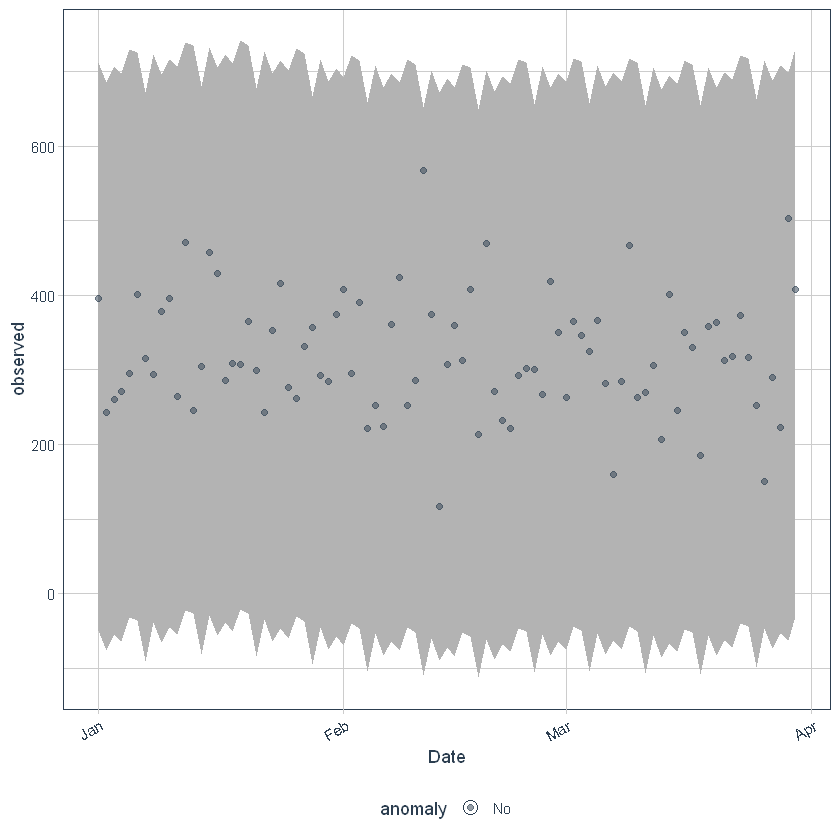

In [20]:
data %>%
    time_decompose(Sales) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

Our data has no anomaly